In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1) 

In [3]:
df = pd.read_csv('data/bank-additional.csv', sep = ";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
df.shape

(4119, 21)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4116 non-null   float64
 11  campaign        4114 non-null   float64
 12  pdays           4119 non-null   int64  
 13  previous        4117 non-null   float64
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4116 non-null   float64
 16  cons.price.idx  4117 non-null   float64
 17  cons.conf.idx   4117 non-null   f

nr.employed je object, a trebalo bi da bude float, te je to potrebno srediti.

In [8]:
df['nr.employed'].unique()

array(['5099.1', '5191', '5228.1', '5195.8', '4963.6', '5008.7', '5076.2',
       '4991.6', '5017.5', nan, '5023.5', 'no', '5176.3'], dtype=object)

In [9]:
df = df[df['nr.employed'] != 'no']
df.shape

(4118, 21)

In [10]:
df['nr.employed'] = df['nr.employed'].astype("float64")

## Eksploratorna analiza

In [11]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 0
dtype: int64

Nekoliko kolona ima null vrednosti, veoma mali broj u poredjenju sa velicinom seta.

In [12]:
df.isin(['unknown']).sum(axis=0)

age               0  
job               39 
marital           11 
education         167
default           803
housing           105
loan              105
contact           0  
month             0  
day_of_week       0  
duration          0  
campaign          0  
pdays             0  
previous          0  
poutcome          0  
emp.var.rate      0  
cons.price.idx    0  
cons.conf.idx     0  
euribor3m         0  
nr.employed       0  
y                 0  
dtype: int64

Međutim postoji veći broj unknown vrednosti.

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4118.000000,4115.000000,4113.000000,4118.000000,4116.000000,4115.000000,4116.000000,4116.000000,4116.000000,4117.000000
mean,40.115590,256.912029,2.533917,960.412822,0.190476,0.085152,93.579707,-40.496501,3.621325,5166.483094
std,10.313839,254.779948,2.566883,191.945151,0.541961,1.563274,0.579413,4.594520,1.733618,73.672054
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.500000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Možemo primetiti da je veliki raspon godina korisnika, međutim 50% seta ima između 32 i 47 godina što je i očekivano s obzirom na problem. Prosečno su razgovori trajali oko 4 minuta, ali je velika standardna devijacija i vidimo da ima ekstremnih vrednosti od po sat vremena, te je realnije gledati medijanu koja je oko 3 minuta. Većina korisnika u ovoj kampanji je kontaktirana do 3 puta, dok je veliki broj onih koji su sada prvi put kontaktirani, tj. nisu bili kontaktirani u prethonim kampanjama što vidimo iz pdays, gde je vrednost 999 za minimum 75% seta. 

In [14]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2508,1264,3314,2175,3349,2651,1377,859,3522,3667


Već ovde vidimo da je nebalansirana klasa koju ćemo kasnije predviđati, skoro 90% seta nije htelo da otvori štedni račun. Najčešće se radi o korisnicima koji su u braku, visoko su obrazovani i od kredita uglavnom imaju stambeni kredit.

In [15]:
df.groupby(['y'])[['age', 'duration', 'pdays', 'campaign']].agg([np.mean, np.std])

age               duration                   pdays              \
          mean        std        mean         std        mean         std   
y                                                                           
no   39.897464  9.865952   219.508188  198.318334  982.758658  125.945534   
yes  41.889135  13.292977  560.787140  411.537717  778.722838  413.150869   

     campaign            
         mean       std  
y                        
no   2.602130  2.669714  
yes  1.980044  1.370175

Starost korisnika nema velikog uticaja na to da li će prihvatiti štednju ili ne, ali vidimo da se na istu u proseku odlučuju korisnici srednjih godina što je očekivano. Duži razgovori sa korisnicima mogu uticati na pozitivan ishod kampanje. Broj poziva u toku kampanje za one koji se odbili jeste u proseku veći u odnosu na one koji su prihvatili, međutim i to je očekivano. Samo sa ovim informacijama ne može puno da se zaključi jer mogući outlieri mogu poremetiti prosek, što visoka standardna devijacija u pojedinim  kolonama i potvrđuje.

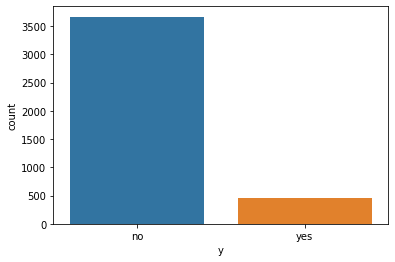

In [16]:
sns.countplot(x='y', data=df)

In [17]:
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
             'euribor3m', 'nr.employed']

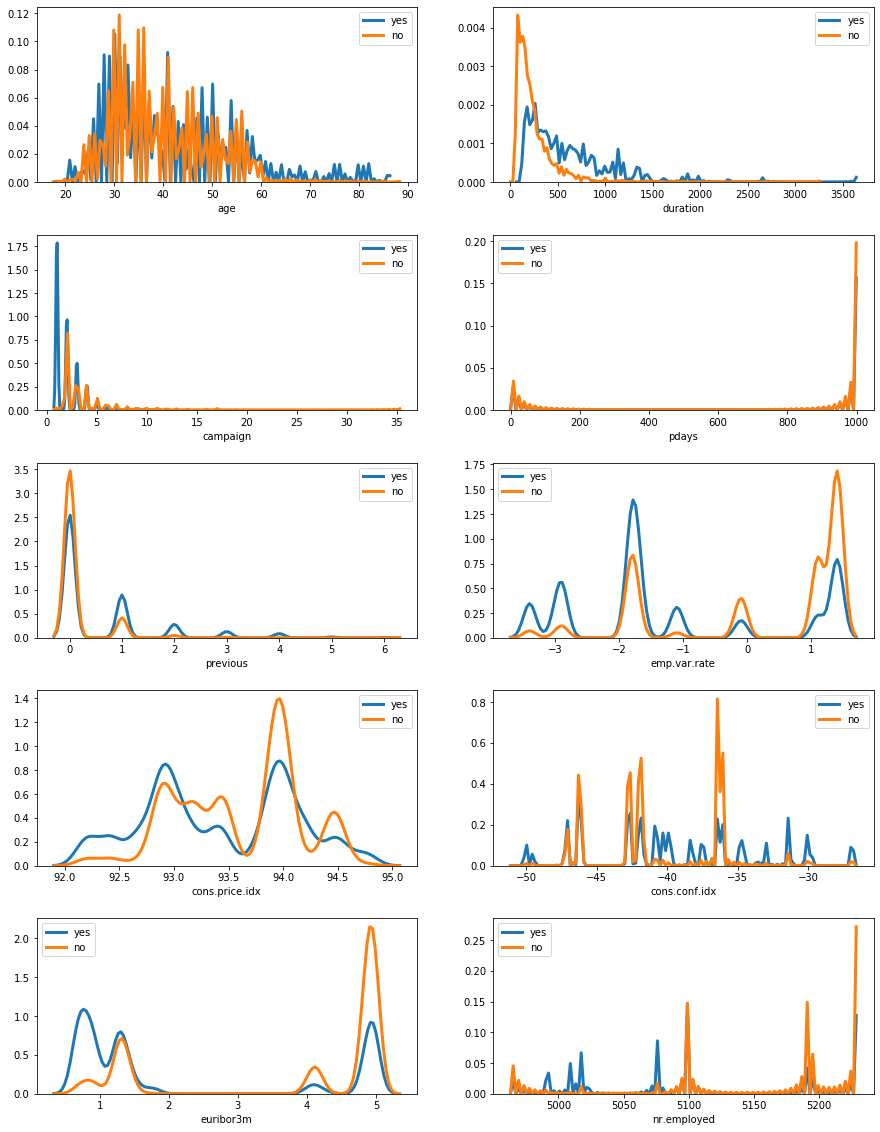

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15,20))
fig.subplots_adjust(hspace=0.3)
hue = ['yes', 'no']
for ax, catplot in zip(axes.flatten(), df[numerical].columns):
    for h in hue:
        subset = df[df['y'] == h]
        sns.distplot(subset[catplot], ax = ax, hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'bw': 0.1},
                 label = h)

Cilj ovih grafika je bio proveriti raspodelu obeležja, i možemo zaključiti da ne podležu normalnoj raspodeli. Pored ovoga poredili smo one koji su se odlučili na štednju i one koji nisu, i dolazimo do potvrda nekih zaključaka od ranije. Vidimo da ukoliko neko prihvati ponudu, to najčešće radi pri inicijalnom kontaktu, ređe nakon nekoliko poziva. Najviše korisnika odbija ponudu ukoliko su već jednom bili kontaktirani. Svakako bolji ekonomski status vuče i bolje uslove štednje te se korisnici pri takvim uslovima pre odlučuju za štednju.

In [19]:
categorical = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
binary = ['default', 'housing', 'loan']
for c in categorical:
    print(c.upper())
    print(pd.crosstab(df[c], df['y']).apply(lambda r: r/r.sum(), axis=1))
    print()

JOB
y                    no       yes
job                              
admin.         0.868577  0.131423
blue-collar    0.930917  0.069083
entrepreneur   0.945946  0.054054
housemaid      0.900000  0.100000
management     0.907407  0.092593
retired        0.771084  0.228916
self-employed  0.918239  0.081761
services       0.910941  0.089059
student        0.768293  0.231707
technician     0.884226  0.115774
unemployed     0.828829  0.171171
unknown        0.897436  0.102564

MARITAL
y               no       yes
marital                     
divorced  0.903587  0.096413
married   0.899522  0.100478
single    0.865568  0.134432
unknown   0.909091  0.090909

EDUCATION
y                          no       yes
education                              
basic.4y             0.911215  0.088785
basic.6y             0.925439  0.074561
basic.9y             0.925087  0.074913
high.school          0.894680  0.105320
illiterate           1.000000  0.000000
professional.course  0.878505  0.121495
univer

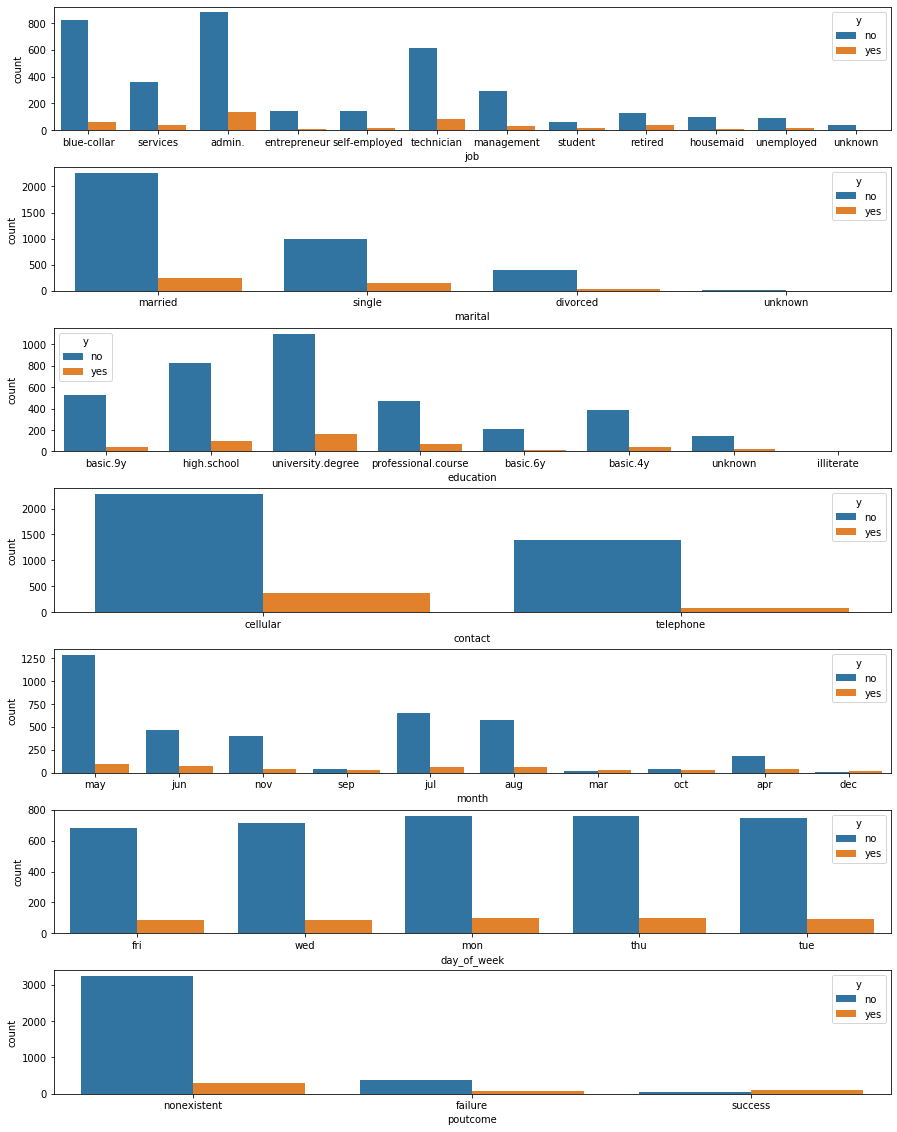

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15,20))
fig.subplots_adjust(hspace=0.3)
for ax, catplot in zip(axes.flatten(), df[categorical].columns):
     sns.countplot(x=catplot, hue = 'y', data=df, ax=ax)

Bilo iz procenata, bilo iz grafika iznad, možemo zaključiti da veliki broj kategoričkih varijabli može biti od značaja za predikciju. Jedini atribut koji nije mnogo informativan bi bio dan u nedelji gde su procenti poprilično slični kad gledamo one koji su prihvatili i one koji nisu.

In [21]:
for c in binary:
    print(c.upper())
    print(pd.crosstab(df[c], df['y']).apply(lambda r: r/r.sum(), axis=1))
    print()

DEFAULT
y              no       yes
default                    
no       0.878696  0.121304
unknown  0.938979  0.061021
yes      1.000000  0.000000

HOUSING
y              no       yes
housing                    
no       0.890098  0.109902
unknown  0.914286  0.085714
yes      0.889655  0.110345

LOAN
y              no       yes
loan                       
no       0.888325  0.111675
unknown  0.914286  0.085714
yes      0.897590  0.102410



Default feature je sumnjiv jer su oni koji imaju taj kredit 100% odbili ponudu za štednju, te ćemo to proveriti kasnije.

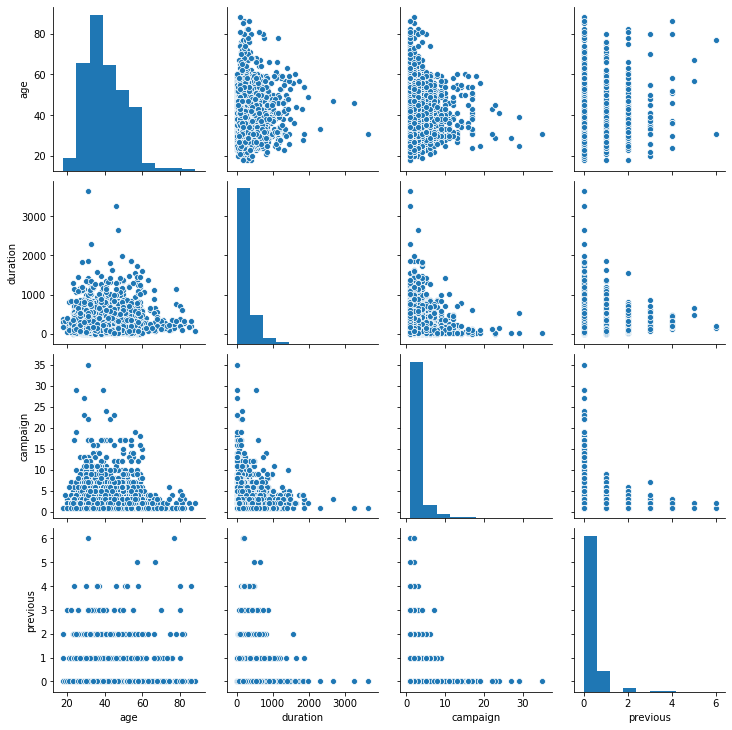

In [22]:
sns.pairplot(df[["age","duration","campaign","previous"]])

Možemo zaključiti da su pojedini atributi korelisani. Na primer što je manji broj poziva u prethodnim kampanjama, veći je trenutnoj. Takođe pozivi su duži ukoliko korisnici nisu ranije kontaktirani. Možemo pogledati i kako su korelisani ekonomski parametri.

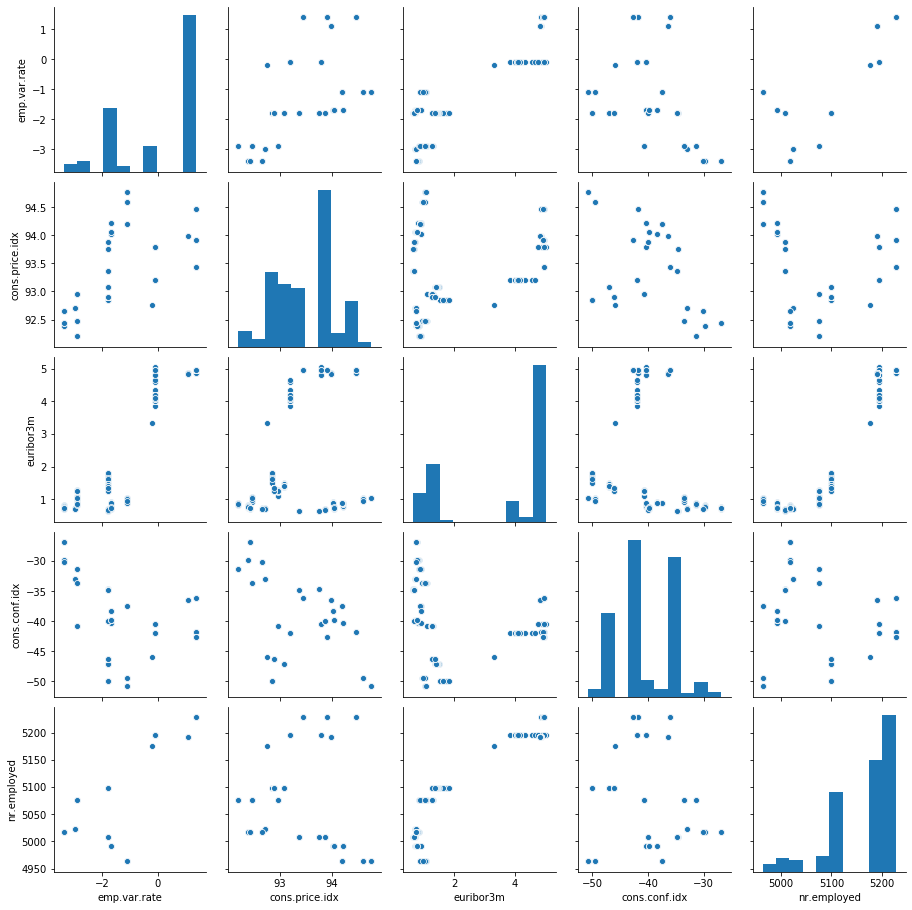

In [23]:
sns.pairplot(df[["emp.var.rate","cons.price.idx","euribor3m","cons.conf.idx","nr.employed"]])

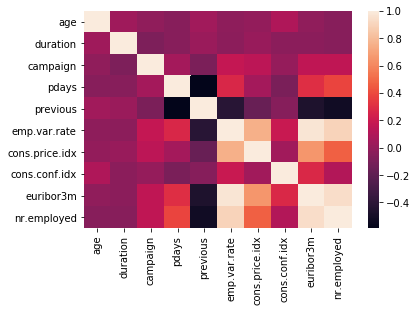

In [24]:
numerics = df[numerical]
corr_matrix = numerics.corr(method='pearson')

sns.heatmap(corr_matrix)

Na ovom grafiku možemo potvrditi zaključke od ranije kada je korelacija u pitanju.

## Nedostajuce vrednosti 

In [25]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          3
campaign          5
pdays             0
previous          2
poutcome          0
emp.var.rate      3
cons.price.idx    2
cons.conf.idx     2
euribor3m         2
nr.employed       1
y                 0
dtype: int64

Nedostajuće vrednosti ćemo ili popuniti modusom ili medijanom, jer obeležja nemaju normalnu raspodelu, te srednja vrednost nije preporučljiva.

In [26]:
econ_cols = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for col in econ_cols:
    df[col] = df[col].fillna(df[col].mode().values[0])

In [27]:
df[['campaign', 'duration']].describe()

,campaign,duration
count,4113.000000,4115.000000
mean,2.533917,256.912029
std,2.566883,254.779948
min,1.000000,0.000000
25%,1.000000,103.000000
50%,2.000000,181.000000
75%,3.000000,317.500000
max,35.000000,3643.000000


In [28]:
df['campaign'].unique()

array([ 2.,  4.,  1.,  3.,  6.,  7., 27.,  5., 12., nan, 14., 10.,  8.,
       11., 13.,  9., 15., 16., 18., 17., 22., 19., 23., 24., 35., 29.])

In [29]:
df['campaign'] = df['campaign'].fillna(df['campaign'].mode().values[0])

In [30]:
df['duration'] = df['duration'].fillna(df['duration'].median())

In [31]:
df['previous'].unique()

array([ 0.,  2.,  1.,  3., nan,  5.,  4.,  6.])

In [32]:
df['previous'].value_counts()

0.0    3520
1.0    475 
2.0    78  
3.0    25  
4.0    14  
6.0    2   
5.0    2   
Name: previous, dtype: int64

In [33]:
df['previous'] = df['previous'].fillna(0.0)

In [34]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## Kategoricki podaci

In [35]:
df.describe(include=['object'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118,4118
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2508,1264,3314,2175,3349,2651,1377,859,3522,3667


In [36]:
df.isin(['unknown']).sum()

age               0  
job               39 
marital           11 
education         167
default           803
housing           105
loan              105
contact           0  
month             0  
day_of_week       0  
duration          0  
campaign          0  
pdays             0  
previous          0  
poutcome          0  
emp.var.rate      0  
cons.price.idx    0  
cons.conf.idx     0  
euribor3m         0  
nr.employed       0  
y                 0  
dtype: int64

Imamo veliki broj "unknown" vrednosti, ali kako ne možemo da budemo sigurni da je to nedostajuća vrednost, ne možemo ih tek tako izbaciti ili zameniti kao prethodne.

In [37]:
unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan' ]
for column in unknown:
    print(column.upper())
    print(df[column].value_counts().index.values)

JOB
['admin.' 'blue-collar' 'technician' 'services' 'management' 'retired'
 'self-employed' 'entrepreneur' 'unemployed' 'housemaid' 'student'
 'unknown']
MARITAL
['married' 'single' 'divorced' 'unknown']
EDUCATION
['university.degree' 'high.school' 'basic.9y' 'professional.course'
 'basic.4y' 'basic.6y' 'unknown' 'illiterate']
DEFAULT
['no' 'unknown' 'yes']
HOUSING
['yes' 'no' 'unknown']
LOAN
['no' 'yes' 'unknown']


In [38]:
df['default'].value_counts()

no         3314
unknown    803 
yes        1   
Name: default, dtype: int64

In [39]:
pd.crosstab(df['y'], df['default'])

default,no,unknown,yes
y,,,
no,2912,754,1
yes,402,49,0


Vidimo da samo jedan korisnik ima default kredit i veliki broj je unknown, te je bolje da ovaj atribut izbacimo iz dalje analize.

In [40]:
df = df.drop(columns=['default'])

In [41]:
edu_dict = {
    'illiterate': 0,
    'unknown': 1,
    'basic.4y': 2,
    'basic.6y': 3,
    'basic.9y': 4,
    'high.school' : 5,
    'professional.course': 6,
    'university.degree': 7
}
df['education'] = df['education'].map(edu_dict)

In [42]:
df = pd.get_dummies(df, columns=['job', 'marital', 'loan', 'housing', 'month', 'day_of_week'], prefix = ['job', 'marital', 'loan', 'housing','month', 'day'])
df = df.drop(columns=['job_unknown', 'marital_unknown', 'loan_unknown', 'housing_unknown', 'month_mar', 'day_mon'])

In [43]:
df.head()

,age,education,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,loan_no,loan_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_may,month_nov,month_oct,month_sep,day_fri,day_thu,day_tue,day_wed
0,30,4,cellular,487.0,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1,39,5,telephone,346.0,4.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,25,5,telephone,227.0,1.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
3,38,4,telephone,17.0,3.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,47,7,cellular,58.0,1.0,999,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
df['contact_cellular'] = df['contact'].map({'telephone': 0, 'cellular': 1})
df = df.drop(columns=['contact'])

In [45]:
df['poutcome'].value_counts()

nonexistent    3522
failure        454 
success        142 
Name: poutcome, dtype: int64

In [46]:
pd.crosstab(df['y'], df['poutcome'])

poutcome,failure,nonexistent,success
y,,,
no,387,3230,50
yes,67,292,92


In [47]:
pd.crosstab(df['poutcome'], df['y']).apply(lambda r: r/r.sum(), axis=1)

y,no,yes
poutcome,,
failure,0.852423,0.147577
nonexistent,0.917093,0.082907
success,0.352113,0.647887


In [48]:
out_dict = {
    'nonexistent': 0,
    'failure': 1,
    'success': 2
}
df['poutcome'] = df['poutcome'].map(out_dict)

In [49]:
df['y'] = df['y'].map({'no':0, 'yes':1})

In [50]:
y = df.pop('y')

In [51]:
df['y'] = y

In [52]:
df.head()

,age,education,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,loan_no,loan_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_may,month_nov,month_oct,month_sep,day_fri,day_thu,day_tue,day_wed,contact_cellular,y
0,30,4,487.0,2.0,999,0.0,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,39,5,346.0,4.0,999,0.0,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,25,5,227.0,1.0,999,0.0,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,38,4,17.0,3.0,999,0.0,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,47,7,58.0,1.0,999,0.0,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [53]:
df.groupby(by=['poutcome'])['pdays'].describe()

,count,mean,std,min,25%,50%,75%,max
poutcome,,,,,,,,
0,3522.0,999.000000,0.000000,999.0,999.0,999.0,999.0,999.0
1,454.0,959.825991,193.014607,3.0,999.0,999.0,999.0,999.0
2,142.0,5.218310,3.169259,0.0,3.0,4.0,6.0,19.0


## Izuzeci

In [54]:
columns = ['age', 'campaign', 'duration']

In [55]:
df.shape

(4118, 45)

In [56]:
from scipy import stats

z = np.abs(stats.zscore(df[columns]))
df = df[(z < 5).all(axis=1)]
df.shape

(4070, 45)

Kako je klasa koju predviđamo nebalansirana, odlučila sam da prag za outlier bude 5 sigmi umesto 3, kako bih ostavila više opservacija kojima je outcome 1.

## Podela na train i test

In [57]:
df.head()

,age,education,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,loan_no,loan_yes,housing_no,housing_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_may,month_nov,month_oct,month_sep,day_fri,day_thu,day_tue,day_wed,contact_cellular,y
0,30,4,487.0,2.0,999,0.0,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,39,5,346.0,4.0,999,0.0,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,25,5,227.0,1.0,999,0.0,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,38,4,17.0,3.0,999,0.0,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,47,7,58.0,1.0,999,0.0,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [58]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

## Skaliranje

S obzirom da su izbačeni izuzeci, a i da većina varijabli nema normalnu raspodelu, kao i da imamo dosta binarnih varijabli, koristićemo MinMax skaliranje.

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[0.21428571, 1.        , 0.03942896, ..., 0.        , 1.        ,
        1.        ],
       [0.12857143, 1.        , 0.2746431 , ..., 0.        , 0.        ,
        1.        ],
       [0.45714286, 1.        , 0.42760027, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 1.        , 0.04350782, ..., 1.        , 0.        ,
        1.        ],
       [0.37142857, 0.85714286, 0.06118287, ..., 0.        , 0.        ,
        1.        ],
       [0.58571429, 0.28571429, 0.08837525, ..., 0.        , 0.        ,
        0.        ]])

## Balansiranje

Zbog nebalansiranosti klase koju predviđamo potrebno je izvršiti balansiranje. U ovom trenutku nije sigurno da li je bolje raditi undersample ili oversample, te ćemo probati oba i na osnovu rezultata doneti odluku.

In [61]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=0)
X_train_us, y_train_us = under_sampler.fit_resample(X_train, y_train)

In [62]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_os, y_train_os = sm.fit_sample(X_train, y_train.ravel())

In [63]:
print(f"Bez balansiranja: {X_train.shape}")
print(f"Undersample: {X_train_us.shape}")
print(f"Oversample: {X_train_os.shape}")

Bez balansiranja: (2849, 44)
Undersample: (598, 44)
Oversample: (5100, 44)


# Klasifikacija

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_val_score
def eval_metrics(y_test, y_pred, y_pred_proba):    
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Precision: ', precision_score(y_test, y_pred))
    print('Recall: ', recall_score(y_test, y_pred))
    print('Roc-auc: ', roc_auc_score(y_test, y_pred_proba))

In [65]:

def cross_validate(metrics, model):
    for metric in metrics:
        print(metric.upper())
        print(cross_val_score(model, X_train, y_train, cv=10, scoring=metric).mean())

In [66]:
metrics = ['accuracy', 'recall', 'roc_auc']

### Poređenje rezultata modela sa nebalansiranim i balansiranim podacima

In [67]:
from sklearn.linear_model import LogisticRegression

model_lr_raw = LogisticRegression()
model_lr_raw.fit(X_train, y_train)

model_lr_us = LogisticRegression()
model_lr_us.fit(X_train_us, y_train_us)

model_lr_os = LogisticRegression()
model_lr_os.fit(X_train_os, y_train_os)

LogisticRegression()

In [68]:
y_pred_raw = model_lr_raw.predict(X_test)
y_pred_us = model_lr_us.predict(X_test)
y_pred_os = model_lr_os.predict(X_test)

In [69]:
y_pred_raw_proba = model_lr_raw.predict_proba(X_test)
y_pred_us_proba = model_lr_us.predict_proba(X_test)
y_pred_os_proba = model_lr_os.predict_proba(X_test)

#### Nebalansirani

In [70]:
eval_metrics(y_test, y_pred_raw, y_pred_raw_proba[:,1])

Accuracy:  0.9074529074529074
Precision:  0.6875
Recall:  0.38461538461538464
Roc-auc:  0.9357590461486565


#### Undersample

In [71]:
eval_metrics(y_test, y_pred_us, y_pred_us_proba[:,1])

Accuracy:  0.8484848484848485
Precision:  0.4280821917808219
Recall:  0.8741258741258742
Roc-auc:  0.9331512643200955


#### Oversample

In [72]:
eval_metrics(y_test, y_pred_os, y_pred_os_proba[:,1])

Accuracy:  0.8755118755118755
Precision:  0.4816326530612245
Recall:  0.8251748251748252
Roc-auc:  0.9383992630745879


Nebalansirani podaci su postigli veoma loše rezultate što je i očekivano, jer model ima priliku da uči o pozitivnoj klasi samo na osnovu 10% seta. Balansirani podaci su postigli bolje rezultate, s tim da je preciznost modela lošija.
Za ovaj problem false negative greška mnogo gora opcija. Ukoliko ne pozovemo korisnika koji bi hteo da otvori štednju u banci, gubitak bi bio značajan jer bismo izgubili sav depozit koji bi inače bio na raspolaganju. Zbog toga odlučujem da žrtvujem precizonost modela, za šta je trošak samo poziv ka korisniku koji će dobiti ponudu za koju može da kaže da nije zainteresovan i optimizovaću odziv i  tako smanjiti false negative grešku. 
Zbog toga, radićemo undersample podataka, jer je on dao najbolje rezultate.

In [73]:
X_train, y_train = X_train_us, y_train_us

## Treniranje modela sa podrazumevanim parametrima

### Logistička regresija

In [74]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = model_lr.predict(X_train)
y_pred_proba = model_lr.predict_proba(X_train)

#### Logistička regresija trening set podataka

In [76]:
eval_metrics(y_train, y_pred, y_pred_proba[:,1])

Accuracy:  0.8812709030100334
Precision:  0.8825503355704698
Recall:  0.8795986622073578
Roc-auc:  0.9496873636760215


#### Evaluacija kros validacijom

In [77]:
cross_validate(metrics, model_lr)

ACCURACY
0.8512146892655366
RECALL
0.8460919540229884
ROC_AUC
0.9287203065134101


In [78]:
y_pred = model_lr.predict(X_test)
y_pred_proba = model_lr.predict_proba(X_test)

#### Logistička regresija test set podataka

In [79]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.8484848484848485
Precision:  0.4280821917808219
Recall:  0.8741258741258742
Roc-auc:  0.9331512643200955


Logistička regresija se već da podrazumevanim parametrima modela pokazala kao dosta dobra. Na testu su opale vrednosti mera, najviše se odrazilo na preciznost jer je ipak učio o pozitivnoj klasi na dosta manjem broju opservacija pozitivne klase, ali ostale mere su zadovoljavajuće.

### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [81]:
y_pred = rfc.predict(X_train)
y_pred_proba = rfc.predict_proba(X_train)

#### Random forest trening set podataka

In [82]:
eval_metrics(y_train, y_pred, y_pred_proba[:,1])

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
Roc-auc:  1.0


#### Evaluacija kros validacijom

In [83]:
print('Evaluacija kros validacijom')
cross_validate(metrics, rfc)

Evaluacija kros validacijom
ACCURACY
0.8678813559322034
RECALL
0.8963218390804597
ROC_AUC
0.9140651340996169


In [84]:
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)

#### Random Forest test set podataka

In [85]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.8411138411138411
Precision:  0.41904761904761906
Recall:  0.9230769230769231
Roc-auc:  0.9380035548866718


Random Forest je na trening skupu savršen, što bi značilo da se previše prilagodio trening podacima. To validacija kros validacijom i prediktovanjem na testu i pokazuje. Međutim, i dalje su mere koje optimizijumo sasvim dobre. Trenutno je bolji od logističke regresije.

### KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [87]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

#### KNN train set podataka

In [88]:
eval_metrics(y_train, y_pred, y_pred_proba[:,1])

Accuracy:  0.8043478260869565
Precision:  0.8297101449275363
Recall:  0.7658862876254181
Roc-auc:  0.8918021051218668


#### Evaluacija kros validacijom

In [89]:
cross_validate(metrics, knn)

ACCURACY
0.6889830508474576
RECALL
0.6050574712643678
ROC_AUC
0.7560153256704982


In [90]:
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

#### KNN test set podataka

In [91]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.7461097461097461
Precision:  0.2842377260981912
Recall:  0.7692307692307693
Roc-auc:  0.7983964087860191


KNN je dao znatno lošije rezultate u poređenju sa prethodna dva modela. Mere koje želimo da optimizujemo su čak i na trening skupu podataka lošije, tako da ovaj model se verovatno neće popraviti ni optimizacijom parametara.

## Optimizacija parametara modela

### Logistička regresija

In [92]:
from sklearn.model_selection import GridSearchCV, cross_val_score

clf = LogisticRegression(random_state = 0)
grid_values = {'penalty': ['l1', 'l2'],
               'C':np.arange(0.01,10,0.1)}
grid_clf = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [93]:
grid_clf.best_score_ 

0.8461581920903954

In [94]:
final_logreg = grid_clf.best_estimator_

In [95]:
final_logreg.fit(X_train, y_train)

LogisticRegression(C=1.11, random_state=0)

In [96]:
y_pred = final_logreg.predict(X_test)
y_pred_proba = final_logreg.predict_proba(X_test)

#### Evaluacija na test setu podataka

In [97]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.8501228501228502
Precision:  0.4315068493150685
Recall:  0.8811188811188811
Roc-auc:  0.9334172321185308


Logistička regresija je za nijansu bolja sa optimizovanim parametrima nego sa podrazumevanim.

### Random Forest

In [98]:
tuned_parameters = {
    'min_samples_split': range(2,40,3),
    'max_depth': range(6,20,2),
    'n_estimators' : range(1,20,2)
}

clf = GridSearchCV(RandomForestClassifier(random_state = 0), tuned_parameters, cv=5,
                       scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(6, 20, 2),
                         'min_samples_split': range(2, 40, 3),
                         'n_estimators': range(1, 20, 2)},
             scoring='recall')

In [99]:
clf.best_params_

{'max_depth': 10, 'min_samples_split': 32, 'n_estimators': 17}

In [100]:
clf.best_score_



0.926497175141243

In [101]:
final_rfc = clf.best_estimator_
final_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=32, n_estimators=17,
                       random_state=0)

In [102]:
y_pred = final_rfc.predict(X_test)
y_pred_proba = final_rfc.predict_proba(X_test)

#### Evaluacija na test setu podataka


In [103]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.8222768222768223
Precision:  0.39244186046511625
Recall:  0.9440559440559441
Roc-auc:  0.9343027102767364


Random Forest je takođe popravio odziv sa optimizacijom parametara, međutim to se odrazilo na preciznost modela koja se očekivano smanjila.

### KNN

In [104]:
tuned_parameters = {
    'n_neighbors': np.arange(3,9,2),
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan']}

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5,
                       scoring='recall')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([3, 5, 7]),
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [105]:
clf.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [106]:
clf.best_score_

0.6356497175141242

In [107]:
final_knn = clf.best_estimator_
final_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [108]:
y_pred = final_knn.predict(X_test)
y_pred_proba = final_knn.predict_proba(X_test)

#### Evaluacija na test setu podataka

In [109]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.7526617526617526
Precision:  0.2785515320334262
Recall:  0.6993006993006993
Roc-auc:  0.8083864187760292


KNN je kao i ranije lošiji od prethodna dva.

Zaključak ove analize jeste da možemo koristiti ili Logističku regresiju ili Random Forest za predikcije. S obzirom da smo kao cilj postavili da se ne propuste korisnici koji bi uzeli kredit, odlučila bih se za Random Forest kao najbolji od ova tri.

## Klasterovanje

### K-means

In [110]:
wdf = df[['age', 'education', 'duration', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','loan_yes', 'loan_no', 'marital_divorced', 'marital_married', 'marital_single','housing_no', 'housing_yes','contact_cellular','y']]

In [111]:
wdf.head()

,age,education,duration,campaign,pdays,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,loan_yes,loan_no,marital_divorced,marital_married,marital_single,housing_no,housing_yes,contact_cellular,y
0,30,4,487.0,2.0,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,0,1,0,0,1,1,0
1,39,5,346.0,4.0,999,0,1.1,93.994,-36.4,4.855,5191.0,0,1,0,0,1,1,0,0,0
2,25,5,227.0,1.0,999,0,1.4,94.465,-41.8,4.962,5228.1,0,1,0,1,0,0,1,0,0
3,38,4,17.0,3.0,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,1,0,0,0,0,0
4,47,7,58.0,1.0,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,1,0,0,1,1,0


In [112]:

X_scaled = wdf.drop('y', axis = 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [113]:
X_scaled

array([[0.17142857, 0.57142857, 0.3299458 , ..., 0.        , 1.        ,
        1.        ],
       [0.3       , 0.71428571, 0.23441734, ..., 1.        , 0.        ,
        0.        ],
       [0.1       , 0.71428571, 0.15379404, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.12857143, 0.71428571, 0.04336043, ..., 1.        , 0.        ,
        1.        ],
       [0.57142857, 0.71428571, 0.35772358, ..., 1.        , 0.        ,
        1.        ],
       [0.22857143, 0.71428571, 0.11856369, ..., 0.        , 1.        ,
        1.        ]])

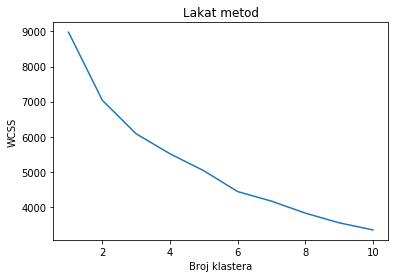

In [114]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Lakat metod')
plt.xlabel('Broj klastera')
plt.ylabel('WCSS')
plt.show()

Krenućemo sa 3 klastera, pa ćemo dodatnim merama evaluacije ispraviti po potrebi.

In [115]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [116]:
y_pred = kmeans.predict(X_scaled)

In [117]:
wdf['cluster'] = y_pred

In [118]:
wdf['cluster'].value_counts()

1    1435
0    1330
2    1305
Name: cluster, dtype: int64

Srazmeran je broj korisnika u svakoj grupi.

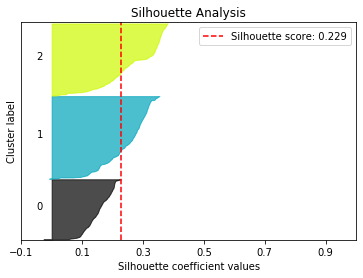

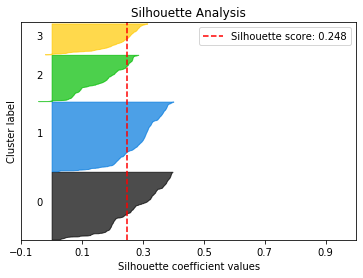

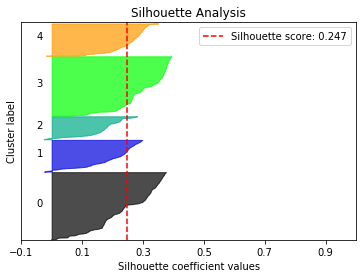

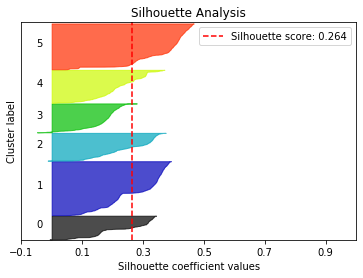

In [120]:
import scikitplot as skplt
for k in range(3, 7):
    kmeans = KMeans(n_clusters=k, max_iter=100).fit(X_scaled)
    cluster_labels = kmeans.labels_
    skplt.metrics.plot_silhouette(X_scaled, cluster_labels)
    plt.show()

Najbolji Silhouette score je za slučaj kada imamo tri klastera jer je tu najmanji. Vidimo da kako raste broj klastera, da se povećava i broj korisnika koji bi moli da pripadaju drugom klasteru. Zbog ovoga bih se zadržala na 3 klastera.

In [121]:
centers = kmeans.cluster_centers_

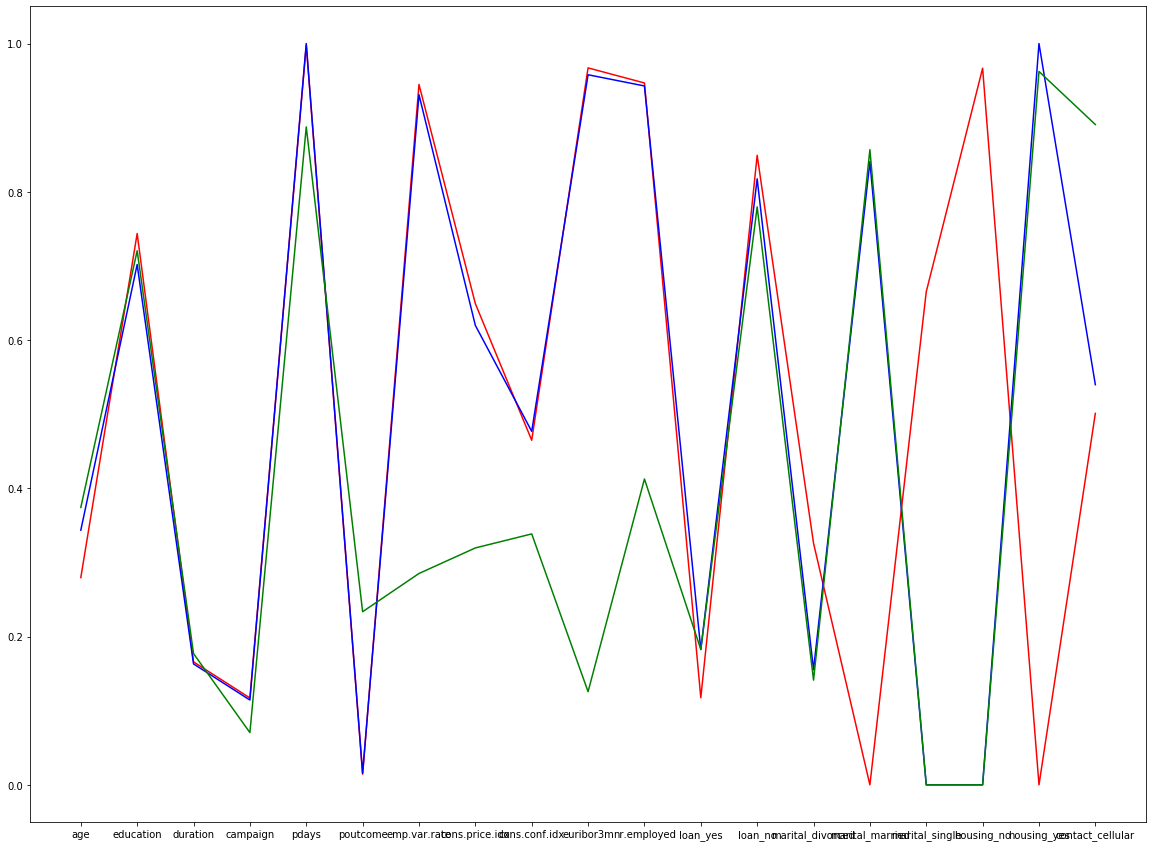

In [148]:
plt.plot(centers[0,:], c = 'r')
plt.plot(centers[1,:], c = 'b')
plt.plot(centers[2,:], c = 'g')
plt.rcParams['figure.figsize']=[20, 15]
plt.xticks(list(range(19)), list(wdf.columns[:-1]))
plt.show()

Iz grafika možemo videti da su korisnici u svim klasterima slični po pitanju stepena obrazovanja, frekvencije kontaktiranja, kao i dužine trajanja poziva. Ono po čemu se razliku i šta ih je odvojilo u grupe su svakako ekonomski parametri, kao i bračni status. 
Plava linija označava klaster koji čine uglavnom mladi ljudi, samci ili razvedeni koji imaju stambeni kredit.
Crvena linija označava one koji su u braku, ima i onih koji su razvedeni, uglavnom nisu kontaktirani ranije, ali iako se očekuje, nemaju kredite nijedne vrste.
Zelena linija nam pokazuje korisnike koji uglavnom imaju partnera i ono što ih ističe jeste da veliki broj njih ima stambeni kredit.

## Treniranje modela nad klasterima

In [123]:
cluster1 = wdf[wdf['cluster'] == 0].drop('cluster', axis=1)
cluster2 = wdf[wdf['cluster'] == 1].drop('cluster', axis=1)
cluster3 = wdf[wdf['cluster'] == 2].drop('cluster', axis=1)

### Prvi klaster

In [124]:
X = cluster1.iloc[:, :-1].values 
y = cluster1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



under_sampler = RandomUnderSampler(random_state=0)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

# sm = SMOTE(random_state=0)
# X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [125]:
clf = LogisticRegression(random_state = 0)
grid_values = {'penalty': ['l1', 'l2'],
               'C':np.arange(0.01,100,10)}
clf = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([1.000e-02, 1.001e+01, 2.001e+01, 3.001e+01, 4.001e+01, 5.001e+01,
       6.001e+01, 7.001e+01, 8.001e+01, 9.001e+01]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [126]:
clf.best_params_

{'C': 20.01, 'penalty': 'l2'}

In [127]:
clf.best_score_ 

0.7595169082125605

In [128]:
final_logreg = clf.best_estimator_

In [129]:
final_logreg.fit(X_train, y_train)

LogisticRegression(C=20.01, random_state=0)

In [130]:
y_pred = final_logreg.predict(X_test)
y_pred_proba = final_logreg.predict_proba(X_test)

In [131]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.7493734335839599
Precision:  0.4397163120567376
Recall:  0.7469879518072289
Roc-auc:  0.8398276650907427


### Drugi klaster

In [132]:
X = cluster2.iloc[:, :-1].values 
y = cluster2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

under_sampler = RandomUnderSampler(random_state=0)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [133]:
clf = LogisticRegression(random_state = 0)
grid_values = {'penalty': ['l1', 'l2'],
               'C':np.arange(0.01,10,0.1)}
grid_clf = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [134]:
grid_clf.best_params_

{'C': 7.8100000000000005, 'penalty': 'l2'}

In [135]:
grid_clf.best_score_ 

0.875

In [136]:
final_logreg = grid_clf.best_estimator_

In [137]:
final_logreg.fit(X_train, y_train)

LogisticRegression(C=7.8100000000000005, random_state=0)

In [138]:
y_pred = final_logreg.predict(X_test)
y_pred_proba = final_logreg.predict_proba(X_test)

In [139]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.8654292343387471
Precision:  0.203125
Recall:  0.65
Roc-auc:  0.8964720194647202


### Treći klaster

In [140]:
X = cluster3.iloc[:, :-1].values 
y = cluster3.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



under_sampler = RandomUnderSampler(random_state=0)
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [141]:
clf = LogisticRegression(random_state = 0)
grid_values = {'penalty': ['l1', 'l2'],
               'C':np.arange(0.01,10,0.1)}
grid_clf = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'C': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91, 1.01,
       1.11, 1.21, 1.31, 1.41, 1.51, 1.61, 1.71, 1.81, 1.91, 2.01, 2.11,
       2.21, 2.31, 2.41, 2.51, 2.61, 2.71, 2.81, 2.91, 3.01, 3.11, 3.21,
       3.31, 3.41, 3.51, 3.61, 3.71, 3.81, 3.91, 4.01, 4.11, 4.21, 4.31,
       4.41, 4.51, 4.61, 4.71, 4.81, 4.91, 5.01, 5.11, 5.21, 5.31, 5.41,
       5.51, 5.61, 5.71, 5.81, 5.91, 6.01, 6.11, 6.21, 6.31, 6.41, 6.51,
       6.61, 6.71, 6.81, 6.91, 7.01, 7.11, 7.21, 7.31, 7.41, 7.51, 7.61,
       7.71, 7.81, 7.91, 8.01, 8.11, 8.21, 8.31, 8.41, 8.51, 8.61, 8.71,
       8.81, 8.91, 9.01, 9.11, 9.21, 9.31, 9.41, 9.51, 9.61, 9.71, 9.81,
       9.91]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [142]:
grid_clf.best_params_

{'C': 2.01, 'penalty': 'l2'}

In [143]:
grid_clf.best_score_ 

0.8111111111111111

In [144]:
final_logreg = grid_clf.best_estimator_

In [145]:
final_logreg.fit(X_train, y_train)

LogisticRegression(C=2.01, random_state=0)

In [146]:
y_pred = final_logreg.predict(X_test)
y_pred_proba = final_logreg.predict_proba(X_test)

In [147]:
eval_metrics(y_test, y_pred, y_pred_proba[:,1])

Accuracy:  0.8801020408163265
Precision:  0.29508196721311475
Recall:  0.8181818181818182
Roc-auc:  0.9266584766584767


Modeli koji su učili na klasterima su se pokazali lošije nego model nad celim skupom podataka. Pretpostavljam da je to zbog toga što svakako imamo nebalansiranu klasu, samim tim i manje opservacija koji imaju pozitivan ishod, a sada smo ovim deljenjem tog broja na 3 skupa još više smanjili mogućnost modela da nauči o toj klasi. Bolje je koristiti model koji je učio nad celim skupom podataka.